# Zadanie nr 1

Zanim przejde do procedury doboru zmiennych, przeprowadze standardowe zapoznanie sie z datasetem, aby zrozumiec co nalezy zbadac i jaki model zastosowac.

In [1]:
# zaimportuj podstawowe biblioteki
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# sciezka do danych
path = r'C:\Users\Adrian\Documents\student-mat.xlsx'

# wczytaj plik do ramki danych
xl = pd.read_excel(path, sheetname='student-mat')

In [3]:
# rzut oka na 5 pierwszych rzedow
xl.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Trzy ostatnie kolumny wydaja sie byc do siebie zblizone, jest to znak zeby przyjrzec sie im blizej.
Dla przypomnienia:
- G1 oznacza ocene z I semestru
- G2 oznacza ocene z II semestru
- G3 oznacza ocene koncowa i uznaje ze jest to nasza zmienna celu do estymacji efektywnosci nauki

In [4]:
# podstawowe dane dotyczace poszczegolnych kolumn
xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Z powyzszego wynika, ze kazda kolumna zawiera 395 rekordow, co oznacza ze nie ma zadnych brakujacyh wartosci. Kolumny numeryczne zostaly prawidlowo wykryte jako 'int64', natomiast zmienne kategoryczne zostaly oznaczone jako 'object'. Za chwile zamienie je rowniez na wartosci numeryczne, aby umozliwic zastosowanie modeli nauczania maszynowego.
Przyjrzyjmy sie teraz rozkladowi zmiennej objasnianej:

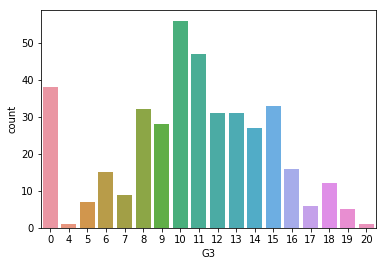

In [5]:
# stworz histogram
sns.countplot(x='G3', data=xl)
plt.show()

Rozklad ten przypomina rozklad normalny, jednak zdecydowanie nim nie jest ze wzgledu na relatywnie wysoka wartosc ocen "0". Warto zatem zerknac na te rekordy i zastanowic sie nad przyczyna takiej ilosci zerowych ocen. Byc moze jest to brak danych i nalezaloby zastosowac jakies wnioskowanie statystyczne aby uzupelnic te liczby.

In [6]:
# wyswietl wszystkie rekordy gdzie ocena ostateczna jest rowna 0
xl[xl['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


W powyzszej tabeli zauwazam, iz kazdy kto otrzymal ocene zerowa w semestrze drugim, automatycznie otrzymal taka sama ocene koncowa. Wniosek jest prosty - sa to studenci, ktorzy z jakichs powodow nie dotrwali do samego konca. Na typ etapie uznaje, ze nietypowy rozklad zmiennej objasnianej G3 jest w porzadku i z czystym sumieniem moge przejsc dalej.

#### 1. Przeprowadź procedurę doboru zmiennych do modelu oraz dobierz odpowiedni model do estymacji efektywności nauki. 

Na poczatku sprawdze korelacje Pearsona pomiedzy zmiennymi i w przypadku wystapienia bardzo silnej korelacji miedzy zmiennymi objasniajacymi (powyzej 0.8), wyeliminuje jedna z nich.  

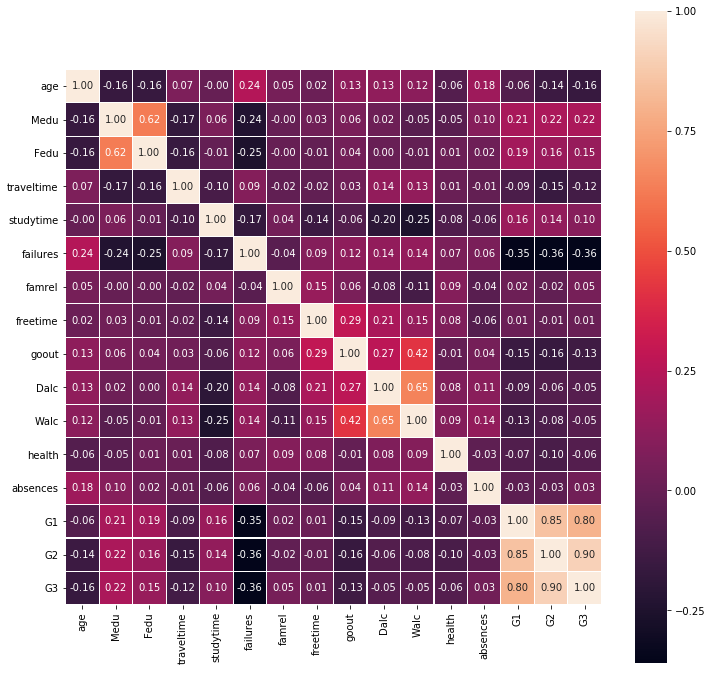

In [7]:
# stworz mape korelacji
colormap = plt.cm.viridis
cor = xl.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot=True, fmt='.2f', square=True, linecolor='white', linewidths=0.1)

Z powyzszej mapy mozna zauwazyc dosyc wysoka korelacje pomiedzy zmiennymi Medu i Fedu oraz Walc i Dalc. Nie jest ona jednak na tyle wysoka, by bledem bylo pozostawienie tych zmiennych w modelu. 
W prawym dolnym rogu natomiast widzimy bardzo silna korelacje pomiedzy zmiennymi G1, G2 i G3, co ma nawet logiczny sens. Aby uniknac tzw. 'wspolliniowosci', jedna ze zmiennych G1 lub G2 musi zostac usunieta. Zjawisko to wystepuje jedynie dla zmiennych objasniajacych. Na tym etapie mozna juz wywnioskowac, ze obydwie zmienne (G1 lub G2) beda mialy zdecydowanie najwiekszy wplyw na estymacje naszego targetu (G3). Usune zmienna G1 podczas podzialu zbioru za kilka chwil.

W tym momencie dokonam konwersji zmiennych kategorycznych na zmienne liczbowe:

In [8]:
# przekonwertuj zmienne kategoreczne na ich liczbowe odpowiedniki
df = pd.get_dummies(xl, drop_first=True) # pomin pierwsza zmienna, ktora bedzie silnie skorelowana z pozostalymi

In [9]:
# ponowne zerknięcie na zmienne i ich typ
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null int64
G1                   395 non-null int64
G2                   395 non-null int64
G3                   395 non-null int64
school_MS            395 non-null uint8
sex_M                395 non-null uint8
address_U            395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_T            395 non-null uint8
Mjob_health          395 non-null uint8
Mjob_other     

In [10]:
# wyodrebij zmienna objasniana
y = df.loc[:, 'G3']

# wyodrebnij zmienne objasniajace, usun zmienna G1
X = df.drop(['G1', 'G3'], axis=1)

print ("ksztalt zbioru X: {} \nksztalt zbioru y: {}".format(X.shape, y.shape))

ksztalt zbioru X: (395, 40) 
ksztalt zbioru y: (395,)


In [11]:
# wyodrebnij zbior treningowy i testowy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2606)

Aby dobrac zmienne, zastosuje metode __'Univariete Statistics'__. Polega ona sprawdzeniu zwiazku kazdej zmiennej objasniajacej ze zmienna celu poprzez sprawdzenie istotnosci statystycznej. 
Jest to jedna z nielicznych bibliotek umozliwiajaca okreslenie istotnosci poszczegolnych zmiennych w Pythonie. Alternatywnie mozna skorzystac z biblioteki 'statsmodels'. 

In [12]:
from sklearn.feature_selection import SelectPercentile, f_regression

# dobierz 25% najistotniejszych zmiennych
select = SelectPercentile(score_func=f_regression, percentile=25)
select.fit(X_train, y_train)

# transformacja zbiorow
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print("X_train.ksztalt: {}".format(X_train.shape))
print("X_train_selected.ksztalt: {}".format(X_train_selected.shape))

X_train.ksztalt: (296, 40)
X_train_selected.ksztalt: (296, 10)


In [13]:
# przypisz wyselekcjonowane zmienne
mask = select.get_support()

# pokaz wyselekcjonowane zmienne
new_features = X_train.columns[mask]
print(new_features)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'G2', 'sex_M',
       'famsize_LE3', 'higher_yes', 'romantic_yes'],
      dtype='object')


W celu przeprowadzenia estymacji efektywnosci nauki, zastosowanie znajdzie model regresji liniowej:

In [14]:
from sklearn.linear_model import LinearRegression

# zainicjuj i wpasuj regresje liniowa
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Wynik dla wszystkich zmiennych: {:.3f}".format(lr.score(X_test, y_test))) # celnosc modelu dla wszystkich zmiennych
lr.fit(X_train_selected, y_train)
print("Wynik dla wyselekcjonowanych zmiennych: {:.3f}".format(
 lr.score(X_test_selected, y_test))) # celnosc modelu dla wyselekcjonowanych zmiennych
print("lr.intercept_: {}".format(lr.intercept_)) # wyraz wolny
print("lr.coef_: {}".format(lr.coef_)) # wspolczynniki regresji

Wynik dla wszystkich zmiennych: 0.823
Wynik dla wyselekcjonowanych zmiennych: 0.824
lr.intercept_: 0.022602049616581965
lr.coef_: [-0.08791967  0.0738203  -0.12502988  0.03658627 -0.32416287  1.07620628
  0.16537401  0.26600613  0.29427277  0.1300045 ]


#### 2. Określ istotność poszczególnych zmiennych w modelu estymującym efektywność nauki  

Istotnosc kazdej zmiennej moze zostac okreslana za pomoca wartosci 'p'. Czym nizsza wartosc tego wspolczynnika, tym wieksza istotnosc danej zmiennej. W ponizszej tabeli po raz kolejny obserwujemy jak olbrzymi wplyw na estymacje ma zmienna G2.

In [15]:
# przypisz wartosci p
p = select.pvalues_

# stworz ramke danych
p_values_df = pd.DataFrame(p, X_train.columns, columns=['wartosc_p'])

# posortuj wartosci od najbardziej istotnych i wyswietl 10 pierwszych
top10 = p_values_df.sort_values('wartosc_p').head(10)
top10

,wartosc_p
G2,1.223537e-109
failures,2.079686e-10
Medu,4.664993e-04
higher_yes,6.389775e-04
age,1.285453e-03
traveltime,5.362523e-03
Fedu,1.181152e-02
romantic_yes,1.487419e-02
famsize_LE3,1.616750e-02
sex_M,1.830621e-02


#### 3. Zbadaj wpływ poszczególnych zmiennych na końcową ocenę oraz odpowiednio zinterpretuj. 

Ponizsza tabela przedstawia wspolczynniki regresji dla dziesieciu najistotniejszych zmiennych. Mozemy z niej wyczytac, ze zmienne takie jak "wiek", "edukacja ojca", czy "liczba poprzednich niepowodzen" negatywnie wplywaja na wynik koncowy (zmienna G3). Z tych trzech zmiennych, najsilniejszy wplyw ma ta ostatnia. Oznacza to, ze osoba majaca problemy z nauka w przeszlosci, bedzie prawdopodobnie slabiej sie uczyla w przyszlosci. 
Pozostale zmienne pozytywnie wplywaja na ocene koncowa. Jesli ktos otrzymal dobra ocene z poprzedniego semestru, istnieja spore szanse na troszke lepsza ocene koncowa. W nastepnej kolejnosci pozytywnie wplywaja takie zmienne jak "chec podjecia wyzszej edukacji" czy "wielkosc rodziny".

In [16]:
# stworz ramke danych
wplyw_zmiennych_df = pd.DataFrame(lr.coef_, new_features, columns=['wspolczynnik'])
wplyw_zmiennych_df

,wspolczynnik
age,-0.087920
Medu,0.073820
Fedu,-0.125030
traveltime,0.036586
failures,-0.324163
G2,1.076206
sex_M,0.165374
famsize_LE3,0.266006
higher_yes,0.294273
romantic_yes,0.130005


#### 4. Wykorzystaj znane Ci narzędzia do prezentacji graficznej by w prosty sposób zinterpretować rozwiązanie.  

Do tego celu wykorzystam poziomy wykres slupkowy z biblioteki "pandas", przeznaczony dla ramek danych.

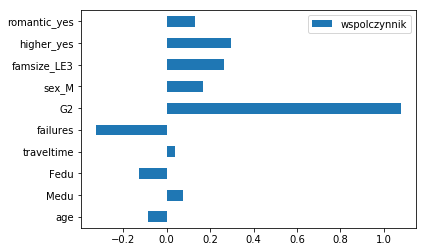

In [17]:
# stworz poziomy wykres slupkowy
wplyw_zmiennych_df.plot(kind='barh')

#### 5. Wykorzystaj wykres waterfall chart do interpretacji udziału poszczególnych zmiennych (5 najsilniej wpływających) na ostateczną ocenę. 

In [18]:
# wyodrebnij 5 zmiennych najsilniej wplywajacych na ostateczna ocene
top5 = wplyw_zmiennych_df.reindex(wplyw_zmiennych_df.wspolczynnik.abs().sort_values(ascending=False).index).head(5)
top5

,wspolczynnik
G2,1.076206
failures,-0.324163
higher_yes,0.294273
famsize_LE3,0.266006
sex_M,0.165374


<module 'matplotlib.pyplot' from 'C:\\Users\\Adrian\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

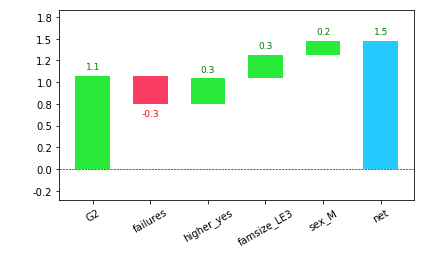

In [19]:
import waterfall_chart

top5_imp_feat = top5.index.tolist()
top5_coef = top5.iloc[:,0].tolist()
waterfall_chart.plot(top5_imp_feat, top5_coef)

Aby uzyskac jak najwyzsza koncowa ocene nalezy:
1. Uzyskac jak najlepsza ocene w okresie poprzedzajacym
2. Unikac niezaliczonych egzaminow
3. Planowac pojscie na studia
4. Pochodzic z rodziny liczacej nie wiecej niz 3 czlonkow
5. Byc mezczyzna (kontrowersyjne, ale typowe dla statystyki czy nauczania maszynowego :))

Na koniec maly bonus. Przy okazji przetestowalem kilka innych metod doboru zmiennych i najlepsza celnosc modelu osiagnalem przy polaczeniu metody Recursive Feature Elimination (RFE) z algorytmem Random Forest:

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=2606), n_features_to_select=10)
rfe.fit(X_train, y_train)

print("Wynik dla 10 zmiennych: {:.3f}".format(rfe.score(X_test, y_test)))

Wynik dla 10 zmiennych: 0.913
